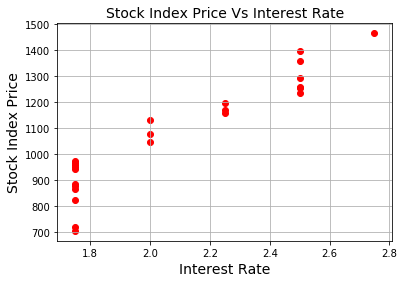

In [6]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
  
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
 
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
 
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [2]:
cdf = df[['Interest_Rate','Stock_Index_Price']]
cdf.head(9)

,Interest_Rate,Stock_Index_Price
0,2.75,1464
1,2.50,1394
2,2.50,1357
3,2.50,1293
4,2.50,1256
5,2.50,1254
6,2.50,1234
7,2.25,1195
8,2.25,1159


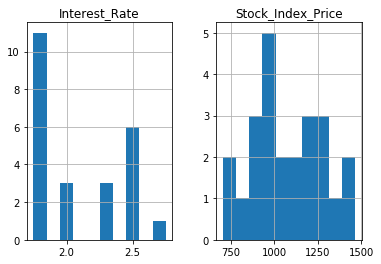

In [7]:
viz = cdf[['Interest_Rate','Stock_Index_Price']]
viz.hist()
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Interest_Rate']])
train_y = np.asanyarray(train[['Stock_Index_Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[550.45810056]]
Intercept:  [-59.70949721]


Text(0, 0.5, 'Stock_Index_Price')

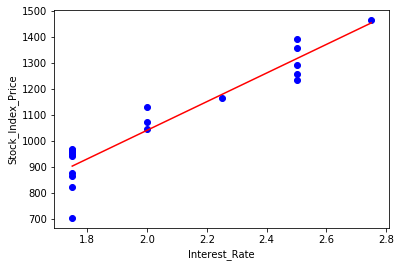

In [13]:
plt.scatter(train.Interest_Rate, train.Stock_Index_Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Interest_Rate")
plt.ylabel("Stock_Index_Price")

In [26]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Interest_Rate']])
test_y = np.asanyarray(test[['Stock_Index_Price']])
test_y_ = regr.predict(test_x)
print(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

[[2.5 ]
 [2.25]
 [2.25]
 [1.75]
 [1.75]]
Mean absolute error: 60.52
Residual sum of squares (MSE): 7802.20
R2-score: 0.71


Text(0, 0.5, 'Stock_Index_Price')

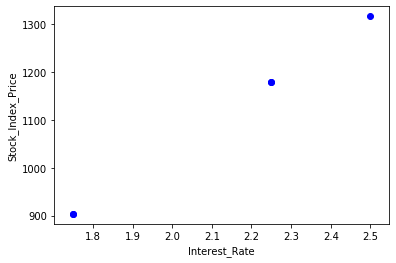

In [15]:
plt.scatter(test_x, test_y_,  color='blue')
plt.xlabel("Interest_Rate")
plt.ylabel("Stock_Index_Price")

Text(0, 0.5, 'Stock_Index_Price')

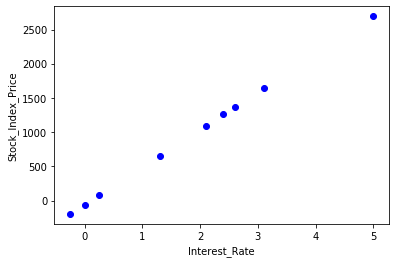

In [35]:
SampleInterestedRates = [-0.25,0,0.25,1.3,2.1,2.4,2.6,3.1,5]
NewInterestRates = np.asanyarray(SampleInterestedRates).reshape(len(SampleInterestedRates),1)
PridictedIndexPrices = regr.predict(NewInterestRates)
plt.scatter(NewInterestRates, PridictedIndexPrices,  color='blue')
plt.xlabel("Interest_Rate")
plt.ylabel("Stock_Index_Price")